<a href="https://colab.research.google.com/github/marcomedugno/marcomedugno/blob/main/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##**Digits Classification Dataset**

#### Marco Medugno

In [ ]:
# import the necessary libraries
import math
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# displays output inline
%matplotlib inline

# Data Preprocessing

In [ ]:
# download dataset
digits_mnist = tf.keras.datasets.mnist
(in_train, out_train), (in_valid, out_valid) = digits_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 60,000 training images, each image is a grayscale image with size 28x28 pixels
# 10,000 testing images, each image is a grayscale image with size 28x28 pixels
# 10 total categories and each label is assigned a number between 0 and 9
in_train.shape, in_valid.shape, np.unique(out_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0
in_valid = in_valid / 255.0

In [ ]:
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine'])}

# Training Set

How many rows of training images would you like to review? 2


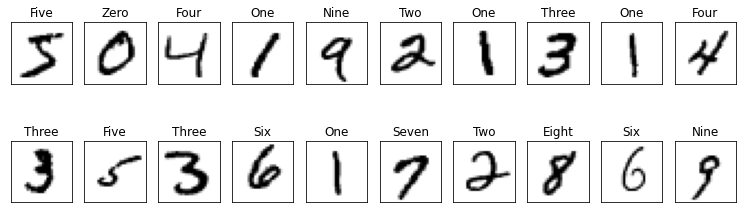

In [ ]:
  num_rows = int(input("How many rows of training images would you like to review? "))
  rows = num_rows * 10

  def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    n_cols = min(10, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 2))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

plot(in_train[:rows], out_train[:rows]) 

# Model in Keras

In [ ]:
model1 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model1.fit(in_train, out_train, batch_size=50, epochs=10, validation_split=0.2)

loss1, accuracy1 = model1.evaluate(in_valid, out_valid)

model2 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.25)

loss2, accuracy2 = model2.evaluate(in_valid, out_valid)

model3 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(135, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2)

loss3, accuracy3 = model3.evaluate(in_valid, out_valid)

model4 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.fit(in_train, out_train, batch_size=80, epochs=10, validation_split=0.3)

loss4, accuracy4 = model4.evaluate(in_valid, out_valid)

model5 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(20, activation="softmax")
])
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model5.fit(in_train, out_train, batch_size=60, epochs=10, validation_split=0.2)

loss5, accuracy5 = model5.evaluate(in_valid, out_valid)

Epoch 1/10
960/960 [==============================] - 4s 4ms/step - loss: 0.3214 - accuracy: 0.9088 - val_loss: 0.1678 - val_accuracy: 0.9542
Epoch 2/10
960/960 [==============================] - 3s 3ms/step - loss: 0.1421 - accuracy: 0.9592 - val_loss: 0.1331 - val_accuracy: 0.9603
Epoch 3/10
960/960 [==============================] - 3s 4ms/step - loss: 0.0981 - accuracy: 0.9717 - val_loss: 0.1061 - val_accuracy: 0.9678
Epoch 4/10
960/960 [==============================] - 3s 4ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.0961 - val_accuracy: 0.9695
Epoch 5/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0891 - val_accuracy: 0.9743
Epoch 6/10
960/960 [==============================] - 3s 4ms/step - loss: 0.0472 - accuracy: 0.9863 - val_loss: 0.0880 - val_accuracy: 0.9731
Epoch 7/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0880 - val_accuracy: 0.9737
Epoch 

In [ ]:
print("Model 1 Accuracy: ",accuracy1)
print("Model 2 Accuracy: ",accuracy2)
print("Model 3 Accuracy: ",accuracy3)
print("Model 4 Accuracy: ",accuracy4)
print("Model 5 Accuracy: ",accuracy5)
# Model 2 is the most accurate model

Model 1 Accuracy:  0.9747999906539917
Model 2 Accuracy:  0.9768999814987183
Model 3 Accuracy:  0.9761000275611877
Model 4 Accuracy:  0.9733999967575073
Model 5 Accuracy:  0.9751999974250793


In [ ]:
model = model2
print("The Accuracy for our final model is %.3f and the loss is %.3f" % (accuracy2,loss2))

The Accuracy for our final model is 0.977 and the loss is 0.078


# Validation Set

In [ ]:
# predict the validation set
probs = model.predict(in_valid)
preds = model.predict(in_valid).argsort()[:,-1]

How many rows of testing images would you like to review? 3


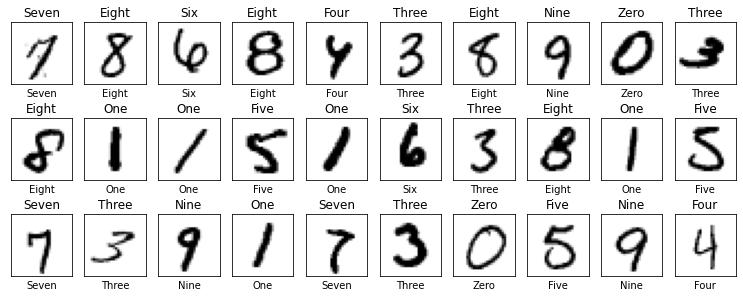

In [ ]:
num_rows = int(input("How many rows of testing images would you like to review? "))
rows = num_rows * 10

rand_idxs = np.random.permutation(len(in_valid))[:rows]
plot(in_valid[rand_idxs], out_valid[rand_idxs], preds[rand_idxs])

# Application

In [ ]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_valid) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(in_valid[index], cmap=plt.cm.binary)
    ax1.set_title("label: %s" % class_names[out_valid[index]])
    ax1.set_xlabel("predict: %s" % class_names[preds[index]])
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…